In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [40]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

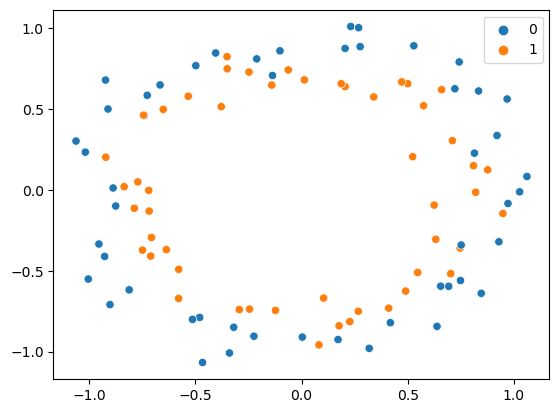

In [41]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [43]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)

In [46]:
history.history

{'loss': [0.6963594555854797,
  0.6937253475189209,
  0.6929244995117188,
  0.6906863451004028,
  0.6900178790092468,
  0.689212441444397,
  0.688042938709259,
  0.6879225373268127,
  0.6867831349372864,
  0.6858589053153992,
  0.6852463483810425,
  0.6846398115158081,
  0.684173047542572,
  0.683292031288147,
  0.6828344464302063,
  0.6820379495620728,
  0.6817096471786499,
  0.6808586120605469,
  0.680528998374939,
  0.6799346208572388,
  0.6791163682937622,
  0.6785556674003601,
  0.6778937578201294,
  0.6776216626167297,
  0.676873505115509,
  0.6768143773078918,
  0.6758373975753784,
  0.6757205128669739,
  0.6750978231430054,
  0.6745725870132446,
  0.6739331483840942,
  0.6734529733657837,
  0.6728969216346741,
  0.6721887588500977,
  0.6716545820236206,
  0.6710964441299438,
  0.6709057092666626,
  0.669882595539093,
  0.6697157025337219,
  0.6688132286071777,
  0.6681123971939087,
  0.6673544049263,
  0.6668777465820312,
  0.6661432385444641,
  0.6654058694839478,
  0.66468399

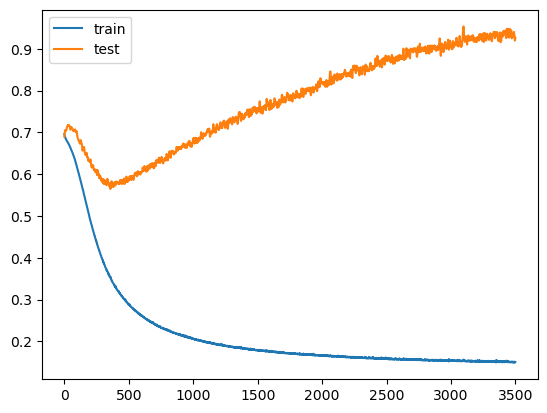

In [47]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

## here we can see that testing data loss is reducing till approx 350 epochs after that due to overfitting loss get increasing so we have to train it for 350 epochs only

9600/9600 [==============================] - 6s 617us/step


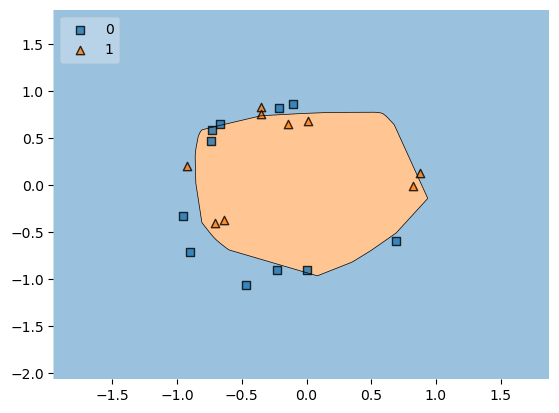

In [48]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

# EARLY STOPPING

In [49]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [52]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 54ms/step - loss: 0.6899 - accuracy: 0.4750 - val_loss: 0.6970 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6883 - accuracy: 0.5125 - val_loss: 0.6999 - val_accuracy: 0.4500
Epoch 3/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6871 - accuracy: 0.5250 - val_loss: 0.7026 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6857 - accuracy: 0.5500 - val_loss: 0.7040 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6849 - accuracy: 0.5500 - val_loss: 0.7050 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6841 - accuracy: 0.5500 - val_loss: 0.7068 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6833 - accuracy: 0.5625 - val_loss: 0.7088 - val_accuracy: 0.4000
Epoch 8/3500


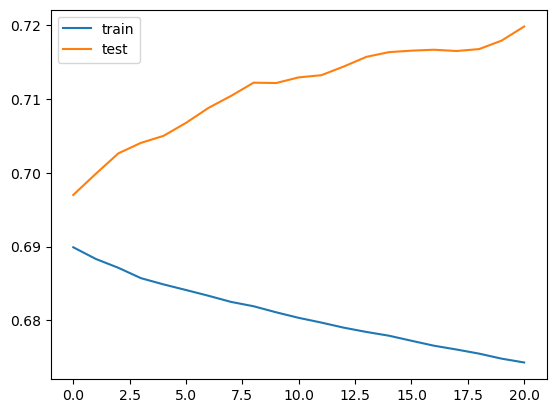

In [53]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 6s 636us/step


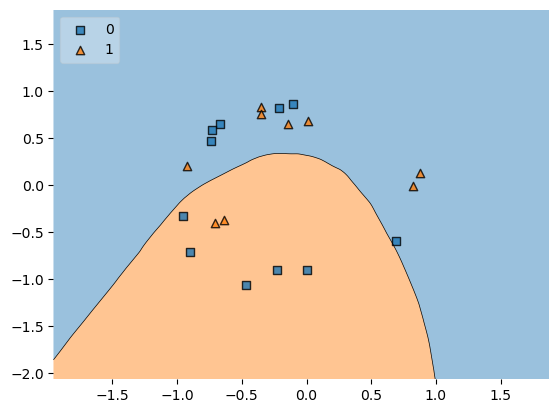

In [54]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()